In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline 
import seaborn as sns

import requests 
import json 
import re
import datetime

In [4]:
data_from_csv = pd.read_csv("23_AichiPrefecture_20201_20214.csv", encoding='cp932', on_bad_lines='skip') 

FileNotFoundError: ignored

In [ ]:
print(data_from_csv.shape)

(40779, 30)


In [ ]:
print(data_from_csv.iloc[0])

No                     1
種類             宅地(土地と建物)
地域                   住宅地
市区町村コード            23101
都道府県名                愛知県
市区町村名            名古屋市千種区
地区名                  青柳町
最寄駅：名称            吹上(愛知)
最寄駅：距離（分）              5
取引価格（総額）        80000000
坪単価                  NaN
間取り                  NaN
面積（㎡）                160
取引価格（㎡単価）            NaN
土地の形状                長方形
間口                   7.2
延床面積（㎡）              180
建築年                平成27年
建物の構造                 木造
用途                  共同住宅
今後の利用目的               住宅
前面道路：方位                東
前面道路：種類               市道
前面道路：幅員（ｍ）           4.2
都市計画             第１種住居地域
建ぺい率（％）               60
容積率（％）             200.0
取引時点          2020年第３四半期
改装                   NaN
取引の事情等               NaN
Name: 0, dtype: object


In [ ]:
data_from_csv["種類"].unique()

array(['宅地(土地と建物)', '宅地(土地)', '中古マンション等', '林地', '農地'], dtype=object)

In [ ]:
data_used_apartment = data_from_csv.query('種類 =="中古マンション等"')

In [ ]:
data_used_apartment.shape

(6031, 30)

In [ ]:
data_used_apartment.head(5)

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
25,26,中古マンション等,NaN,23101,愛知県,名古屋市千種区,揚羽町,茶屋ケ坂,4,13000000,...,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,50,150.0,2021年第３四半期,未改装,NaN
26,27,中古マンション等,NaN,23101,愛知県,名古屋市千種区,揚羽町,茶屋ケ坂,4,6000000,...,NaN,NaN,NaN,NaN,第１種中高層住居専用地域,50,150.0,2021年第２四半期,未改装,NaN
27,28,中古マンション等,NaN,23101,愛知県,名古屋市千種区,揚羽町,茶屋ケ坂,4,17000000,...,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,50,150.0,2021年第１四半期,改装済,NaN
28,29,中古マンション等,NaN,23101,愛知県,名古屋市千種区,揚羽町,茶屋ケ坂,3,20000000,...,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,50,150.0,2020年第４四半期,改装済,NaN
30,31,中古マンション等,NaN,23101,愛知県,名古屋市千種区,揚羽町,茶屋ケ坂,7,21000000,...,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,50,150.0,2020年第２四半期,改装済,NaN


In [ ]:
data_used_apartment.isnull().sum()

No               0
種類               0
地域            6031
市区町村コード          0
都道府県名            0
市区町村名            0
地区名              0
最寄駅：名称           0
最寄駅：距離（分）        0
取引価格（総額）         0
坪単価           6031
間取り            242
面積（㎡）            0
取引価格（㎡単価）     6031
土地の形状         6031
間口            6031
延床面積（㎡）       6031
建築年            185
建物の構造          313
用途            1659
今後の利用目的        283
前面道路：方位       6031
前面道路：種類       6031
前面道路：幅員（ｍ）    6031
都市計画            22
建ぺい率（％）         38
容積率（％）          38
取引時点             0
改装             542
取引の事情等        5957
dtype: int64

In [ ]:
#一つでもNANデータを含む行を削除
data_dropna = data_used_apartment.dropna(subset=['建築年'])

In [ ]:
data_dropna.isnull().sum()

No               0
種類               0
地域            5756
市区町村コード          0
都道府県名            0
市区町村名            0
地区名              0
最寄駅：名称           0
最寄駅：距離（分）        0
取引価格（総額）         0
坪単価           5756
間取り            222
面積（㎡）            0
取引価格（㎡単価）     5756
土地の形状         5756
間口            5756
延床面積（㎡）       5756
建築年              0
建物の構造          210
用途            1526
今後の利用目的        274
前面道路：方位       5756
前面道路：種類       5756
前面道路：幅員（ｍ）    5756
都市計画            19
建ぺい率（％）         32
容積率（％）          32
取引時点             0
改装             496
取引の事情等        5685
dtype: int64

In [ ]:
data_used_apartment["建築年"].unique()

array(['昭和61年', '昭和60年', '昭和62年', '平成6年', '昭和48年', '平成26年', '平成23年',
       '昭和49年', nan, '平成28年', '平成27年', '平成31年', '令和2年', '平成20年', '平成22年',
       '平成21年', '平成8年', '平成3年', '平成12年', '平成17年', '平成10年', '昭和55年',
       '平成19年', '平成24年', '平成13年', '平成16年', '平成11年', '平成15年', '昭和47年',
       '昭和46年', '平成5年', '平成18年', '昭和45年', '昭和64年', '平成14年', '昭和59年',
       '平成2年', '平成7年', '昭和54年', '平成25年', '平成9年', '昭和56年', '昭和57年',
       '平成29年', '令和3年', '平成30年', '昭和53年', '昭和50年', '平成4年', '昭和58年',
       '昭和63年', '昭和52年', '昭和42年', '昭和44年', '戦前', '昭和51年', '昭和43年',
       '昭和41年', '令和4年'], dtype=object)

In [ ]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")

data_selected_dropna = data_dropna[data_dropna["建築年"].str.match('^平成|昭和')]

wareki_to_seireki = {'昭和': 1926-1, '平成': 1989-1}

buliding_year_list = data_dropna["建築年"]

building_age_list = []
for building_year in buliding_year_list:
  building_year_split = re.search(r'(.+?)([0-9]+|元)年', building_year)
  seireki = wareki_to_seireki[building_year_split.groups()[0]] + int(building_year_split.groups()[1])
  building_age = int(year) - seireki 
  building_age_list.append(building_age)

data_selected_dropna["築年数"] = building_age_list

data_added_building_age = data_selected_dropna.drop("建築年", axis=1)
print(data_added_building_age.head())

    No        種類   地域 市区町村コード 都道府県名    市区町村名  地区名 最寄駅：名称 最寄駅：距離（分）  取引価格（総額）  \
25  26  中古マンション等  NaN   23101   愛知県  名古屋市千種区  揚羽町   茶屋ケ坂         4  13000000   
26  27  中古マンション等  NaN   23101   愛知県  名古屋市千種区  揚羽町   茶屋ケ坂         4   6000000   
27  28  中古マンション等  NaN   23101   愛知県  名古屋市千種区  揚羽町   茶屋ケ坂         4  17000000   
28  29  中古マンション等  NaN   23101   愛知県  名古屋市千種区  揚羽町   茶屋ケ坂         3  20000000   
30  31  中古マンション等  NaN   23101   愛知県  名古屋市千種区  揚羽町   茶屋ケ坂         7  21000000   

    ... 前面道路：方位 前面道路：種類 前面道路：幅員（ｍ）          都市計画 建ぺい率（％） 容積率（％）        取引時点  \
25  ...     NaN     NaN        NaN  第１種中高層住居専用地域      50  150.0  2021年第３四半期   
26  ...     NaN     NaN        NaN  第１種中高層住居専用地域      50  150.0  2021年第２四半期   
27  ...     NaN     NaN        NaN  第１種中高層住居専用地域      50  150.0  2021年第１四半期   
28  ...     NaN     NaN        NaN  第１種中高層住居専用地域      50  150.0  2020年第４四半期   
30  ...     NaN     NaN        NaN  第１種中高層住居専用地域      50  150.0  2020年第２四半期   

     改装 取引の事情等 築年数  
25  未改装    NaN  36  
26

In [ ]:
data_added_building_age["築年数"].unique()

array([36, 37, 35, 28, 49,  8, 11, 48,  6,  7,  3, 14, 12, 13, 26, 31, 22,
       17, 24, 42, 15, 10, 21, 18, 23, 19, 50, 51, 29, 16, 52, 33, 20, 38,
       32, 27, 43,  9, 25, 41, 40,  5,  4, 44, 47, 30, 39, 34, 45, 55, 53,
       46, 54, 56])

In [ ]:
use_columns = ["最寄駅：距離（分）", "間取り", "面積（㎡）", "築年数", "建物の構造", "建ぺい率（％）", "市区町村名", "取引価格（総額）", "容積率（％）"]

data_added_building_age = data_added_building_age[use_columns]

data_added_building_age["面積（㎡）"] = data_added_building_age["面積（㎡）"].astype(float)
data_added_building_age["最寄駅：距離（分）"] = data_added_building_age["最寄駅：距離（分）"].astype(float)
data_added_building_age["取引価格（総額）"] = data_added_building_age["取引価格（総額）"].astype(int)

not_dummy = ["最寄駅：距離（分）", "面積（㎡）", "築年数", "建ぺい率（％）", "取引価格（総額）", "容積率（％）"]
dummy_list = ["間取り", "建物の構造", "市区町村名"]

data = pd.concat([data_added_building_age[not_dummy],
                  pd.get_dummies(data_added_building_age[dummy_list], drop_first=True)], axis=1)

print()

In [ ]:
print(data.dtypes)
data.isnull().sum()

data = data.dropna(how='any')
data.isnull().sum()

最寄駅：距離（分）       float64
面積（㎡）           float64
築年数               int64
建ぺい率（％）          object
取引価格（総額）          int64
                 ...   
市区町村名_豊橋市         uint8
市区町村名_豊田市         uint8
市区町村名_長久手市        uint8
市区町村名_額田郡幸田町      uint8
市区町村名_高浜市         uint8
Length: 89, dtype: object


最寄駅：距離（分）       0
面積（㎡）           0
築年数             0
建ぺい率（％）         0
取引価格（総額）        0
               ..
市区町村名_豊橋市       0
市区町村名_豊田市       0
市区町村名_長久手市      0
市区町村名_額田郡幸田町    0
市区町村名_高浜市       0
Length: 89, dtype: int64

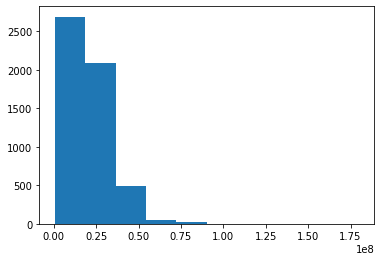

In [ ]:
plt.hist(data["取引価格（総額）"])
plt.show()

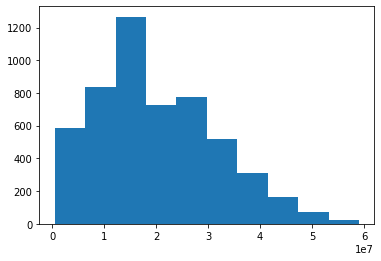

In [ ]:
tmp_data = data[data["取引価格（総額）"] < 60000000]
plt.hist(tmp_data["取引価格（総額）"])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

xlist = ['面積（㎡）']
ylist = ['取引価格（総額）']

x = data[xlist]
y = data[ylist]

lr.fit(x, y)

print(lr.coef_)
print(lr.intercept_)

[[308136.50291844]]
[361919.89961828]


In [ ]:
 x = data.drop("取引価格（総額）", axis=1)
 y = data["取引価格（総額）"]

 print(x.head())
 print(y.head())

    最寄駅：距離（分）  面積（㎡）  築年数 建ぺい率（％）  容積率（％）  間取り_１ＤＫ  間取り_１Ｋ  間取り_１ＬＤＫ  \
25        4.0   75.0   36      50   150.0        0       0         0   
26        4.0   75.0   36      50   150.0        0       0         0   
27        4.0   75.0   36      50   150.0        0       0         0   
28        3.0   75.0   37      50   150.0        0       0         0   
30        7.0   85.0   37      50   150.0        0       0         0   

    間取り_１ＬＤＫ＋Ｓ  間取り_１Ｒ  ...  市区町村名_稲沢市  市区町村名_西尾市  市区町村名_西春日井郡豊山町  市区町村名_豊川市  \
25           0       0  ...          0          0               0          0   
26           0       0  ...          0          0               0          0   
27           0       0  ...          0          0               0          0   
28           0       0  ...          0          0               0          0   
30           0       0  ...          0          0               0          0   

    市区町村名_豊明市  市区町村名_豊橋市  市区町村名_豊田市  市区町村名_長久手市  市区町村名_額田郡幸田町  市区町村名_高浜市  
25         

In [ ]:
lr_multi = LinearRegression()
lr_multi.fit(x, y) 

print(lr_multi.coef_)
print(lr_multi.intercept_)

[-2.78812172e+05  3.64859437e+05 -5.61892419e+05 -6.19558467e+04
  1.14670818e+04  8.71114470e+05 -1.96927029e+05  2.02152379e+06
  2.24004635e+06  3.48929192e+06  2.32847004e+06  1.27624331e+06
  3.66344979e+06  5.60577014e+06  3.68797140e+06  8.52135633e+06
  1.57826648e+06 -2.98196719e+06  5.70065954e+06 -2.23535416e+06
  2.71623656e+06 -5.08059162e+05  1.14192148e+07 -4.88142275e+06
  9.93881818e+05 -1.31008636e+05  1.16985181e+06  3.82276223e+05
  4.01922445e+06  1.28293121e+06  1.30234957e+06 -6.23725156e+06
  4.72482277e+06  2.61126235e+06 -3.07910282e+06  8.85823332e+06
  3.93456466e+06  8.62577175e+06  6.14396371e+06  1.32847818e+07
  5.62326631e+06  1.08112403e+07  7.38449729e+06  2.45971297e+06
  1.22711066e+07  1.15186441e+07  1.06826127e+05  7.00421725e+06
  9.62685157e+06  5.48322640e+06  8.35659159e+06  5.74598307e+06
  2.76487342e+06  1.53072343e+05 -2.57227196e+05  3.31446848e+06
  2.16988738e+06 -8.80157442e+06 -5.98627383e+06  3.19530851e+06
 -1.11320683e+07  3.52114

In [2]:
for i in range(len(lr_multi.coef_)):
  print(x.columns[i], lr_multi.coef_[i])

NameError: ignored